In [ ]:
import os
# Prevenção de vazamento de memória do MKL no Windows
os.environ["OMP_NUM_THREADS"] = "1"

: 

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [3]:
# Carregar os dados
df = pd.read_csv('dados_soja.csv')

In [4]:
# Ajustes nos dados
df['valor'] = df['valor'].replace('-', '0')              # Substitui '-' por '0'
df['valor'] = df['valor'].astype(str).str.replace('.', '', regex=False)  # Remove pontos
df['valor'] = df['valor'].astype(float)                 # Converte para float

In [5]:
# Selecionar variável para clusterização
X = df[['valor']].values

In [6]:
# Padronização (opcional, mas recomendado)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

K=2, Coeficiente de Silhueta = 0.7829
K=3, Coeficiente de Silhueta = 0.7305
K=4, Coeficiente de Silhueta = 0.6910
K=5, Coeficiente de Silhueta = 0.7899
K=6, Coeficiente de Silhueta = 0.7545
K=7, Coeficiente de Silhueta = 0.7496
K=8, Coeficiente de Silhueta = 0.7563
K=9, Coeficiente de Silhueta = 0.7090
K=10, Coeficiente de Silhueta = 0.6574


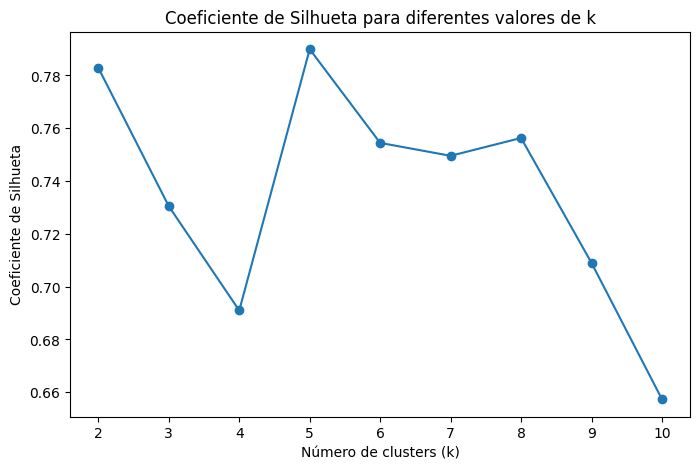

In [7]:
# Testar diferentes números de clusters usando coeficiente de silhueta
silhouette_scores = []
K = range(2, 11)  # testa de 2 a 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"K={k}, Coeficiente de Silhueta = {score:.4f}")

# Plotando gráfico da silhueta
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Coeficiente de Silhueta")
plt.title("Coeficiente de Silhueta para diferentes valores de k")
plt.show()

In [8]:
# Escolher o melhor k (maior silhueta)
best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"\nNúmero ótimo de clusters: {best_k}")


Número ótimo de clusters: 5


In [9]:
# Rodar KMeans final com número ótimo de clusters
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

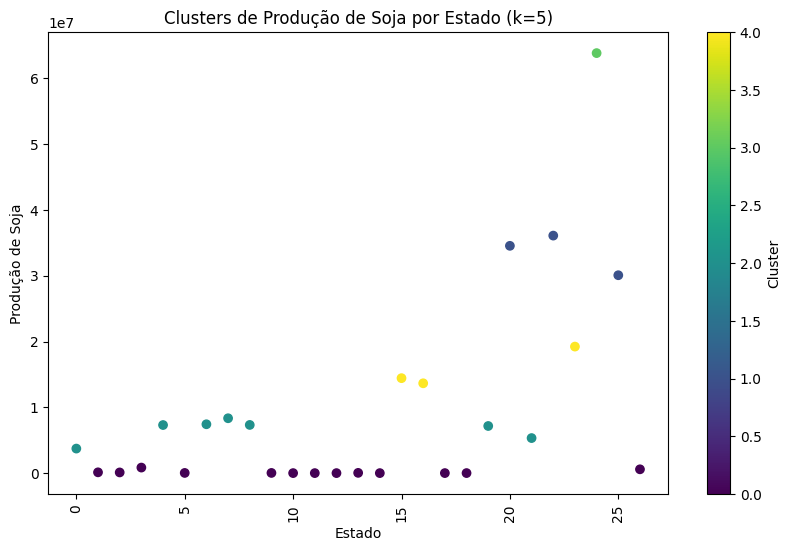

    id       valor  Cluster
0    0   3727182.0        2
1    1    117790.0        0
2    2    101583.0        0
3    3    839864.0        0
4    4   7307684.0        2
5    5     24721.0        0
6    6   7423563.0        2
7    7   8338428.0        2
8    8   7322801.0        2
9    9     25110.0        0
10  10       600.0        0
11  11         0.0        0
12  12         0.0        0
13  13     35327.0        0
14  14         0.0        0
15  15  14432772.0        4
16  16  13653404.0        4
17  17      2951.0        0
18  18      4179.0        0
19  19   7161317.0        2
20  20  34549450.0        1
21  21   5325337.0        2
22  22  36103542.0        1
23  23  19232215.0        4
24  24  63847218.0        3
25  25  30079916.0        1
26  26    576554.0        0


In [10]:
# Visualização final
plt.figure(figsize=(10,6))
plt.scatter(df['id'], df['valor'], c=df['Cluster'], cmap='viridis')
plt.xticks(rotation=90)  # rotaciona os nomes dos estados para caber no gráfico
plt.xlabel('Estado')
plt.ylabel('Produção de Soja')
plt.title(f'Clusters de Produção de Soja por Estado (k={best_k})')
plt.colorbar(label='Cluster')
plt.show()

print(df[['id', 'valor', 'Cluster']])